# GLM Second-Level Analysis

in Nilearn, Second Level Models are used to perform group-level analyses on fMRI data.

Once individual subjects have been processed in a common space (like MNI), these models allow you to make broader inferences about brain activity across a population rather than just a single subject.

The analysis aggregates results (beta weights or contrast maps) from multiple individuals to determine if the observed effect is consistent across a population.

In this tutorial, we will perform a second-level analysis on a dataset that provides contrast maps (t-maps) representing brain activation during mental calculation tasks compared to control conditions like reading or listening to narrative sentences.

The dataset we will use is a subset of the Functional Localizer dataset (often referred to as the Brainomics/Localizer dataset), which is a public neuroimaging resource designed to identify specific task-related functional regions of interest in the brain.

The Functional Localizer dataset is widely used in fMRI research to test hypotheses about brain area functions and as a standard benchmark for machine learning and neuroimaging software like Nilearn.

## Install Nilearn

In [ ]:
!pip install -q nilearn

## Imports

In [ ]:
from nilearn import datasets
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import plotting
import pandas as pd

## Fetch the Dataset

In [ ]:
# fetch the contrast maps for 20 subjects
n_samples = 20
data = datasets.fetch_localizer_calculation_task(n_subjects=n_samples)

[fetch_localizer_calculation_task] Added README.md to /root/nilearn_data

[fetch_localizer_calculation_task] Dataset created in /root/nilearn_data/brainomics_localizer

[fetch_localizer_calculation_task] Downloading data from https://osf.io/hwbm2/download ...

[fetch_localizer_calculation_task]  ...done. (3 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d27cbbd45253a00193c9b70/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d27dbce45253a001a3c32fd/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d27e0221c5b4a001b9efb25/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d27ed481c5b4a001aa09e83/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28000845253a001c3e507a/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d281a2a45253a001c3e684c/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d282aa5114a42001605db5a/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28335545253a00193ce806/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28453a1c5b4a001c9ecaed/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d284daf1c5b4a001d9fc4e5/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d2866c0a26b340017088827/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28781945253a00193d1237/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d2889a7a26b3400160a368f/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d288fb11c5b4a001d9ff738/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28a4c0114a420016064fa2/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28b6171c5b4a001c9f2ebd/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28d2bb114a420017054715/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28e056a26b340019093c95/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28e50945253a00193d6e09/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d28ff54114a42001705610c/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d27037f45253a001c3d4563/ ...

[fetch_localizer_calculation_task]  ...done. (1 seconds, 0 min)

[fetch_localizer_calculation_task] Downloading data from https://osf.io/download/5d7b8948fcbf44001c44e695/ ...

[fetch_localizer_calculation_task]  ...done. (2 seconds, 0 min)

We get the file path of each subject's contrast map:


In [ ]:
# get file path of each subject's contrast map
cmap_filenames = data.cmaps

# show file path of first subject's contrast map
cmap_filenames[0]

'/root/nilearn_data/brainomics_localizer/brainomics_data/S01/cmaps_Auditory&VisualCalculation.nii.gz'

## Perform Second-Level Analysis

### Design Matrix

The design matrix is a single column of ones, corresponding to the model intercept, and where each row corresponds to one subject’s contrast map.

In [ ]:
# set the design matrix: a single colums of ones
design_matrix = pd.DataFrame([1] * n_samples, columns=["intercept"])

### Fit the Model

The Nilearn **`SecondLevelModel`** class is used to perform group-level analyses on fMRI data.

This class implements the General Linear Model to make broader inferences about brain activity across multiple subjects or sessions.

The **`fit`** method fits the model and computes group-level effects.

It handles data loading, voxel-wise modeling, and produces the fitted model object ready for contrast estimation (**`compute_contrast`**).

We create a **`SecondLevelModel`** object and apply the **`fit`** method with the following arguments:
* The list of Nifti images **`cmap_filenames`**.
* The design matrix **`design_matrix`**.

In [ ]:
# create GLM second level model
fmri_glm = SecondLevelModel(verbose=1)

# fit the model
fmri_glm = fmri_glm.fit(cmap_filenames, design_matrix=design_matrix)

[SecondLevelModel.fit] Fitting second level model. Take a deep breath.

[SecondLevelModel.fit] Loading data from <nibabel.nifti1.Nifti1Image object at 0x7d86876b75c0>

[SecondLevelModel.fit] Computing mask

[SecondLevelModel.fit] Resampling mask

[SecondLevelModel.fit] Finished fit

[SecondLevelModel.fit] 
Computation of second level model done in 0.51 seconds.

### z-Map

We create a z-map using the **`compute_contrast`** method of the **`SecondLevelModel`** object we created before:

In [ ]:
# create z-map
z_map = fmri_glm.compute_contrast(output_type="z_score")

[SecondLevelModel.compute_contrast] Loading data from <nibabel.nifti1.Nifti1Image object at 0x7d868763c1a0>

[SecondLevelModel.compute_contrast] Extracting region signals

[SecondLevelModel.compute_contrast] Cleaning extracted signals

[SecondLevelModel.compute_contrast] Computing image from signals

We plot the z-map:

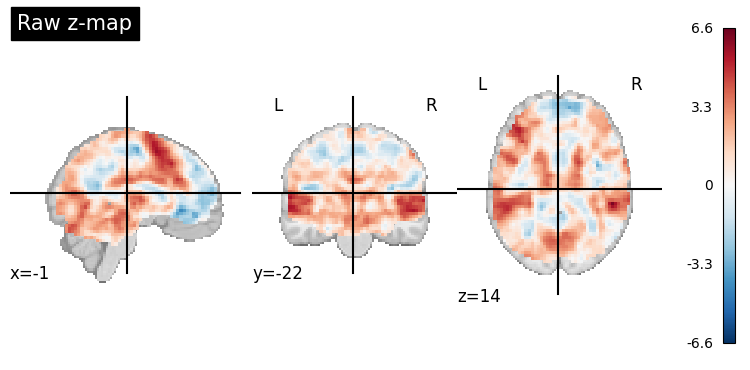

In [ ]:
# plot z-map
plotting.plot_stat_map(z_map, title="Raw z-map")

### Thresholded z-Maps

**Uncorrected**

We create an uncorrected thresholded z-map with a false positive rate lower than 0.001 and a cluster size greater than 10 voxels:

In [ ]:
# create thresholded uncorrested z-map
thresholded_map_fpr, threshold_fpr = threshold_stats_img(
    z_map,
    alpha=0.001,
    height_control="fpr",
    cluster_threshold=10,
    two_sided=True,
)

We plot the z-map:

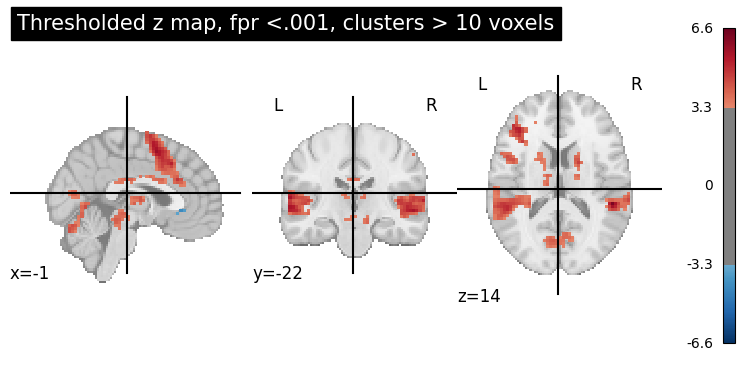

In [ ]:
# plot z-map
plotting.plot_stat_map(
    thresholded_map_fpr,
    cut_coords=display.cut_coords,
    threshold=threshold_fpr,
    title="Thresholded z map, fpr <.001, clusters > 10 voxels",
)

**False Discovery Rate Correction**

FDR correction controls the expected proportion of false discoveries among detections.

We create an FDR corrected thresholded z-map, with an expected FDR set to 0.05, and no cluster-level threshold:

In [ ]:
# create FDR corrected thresholded z-map
thresholded_map_fdr, threshold_fdr = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr"
)

We plot the z-map:

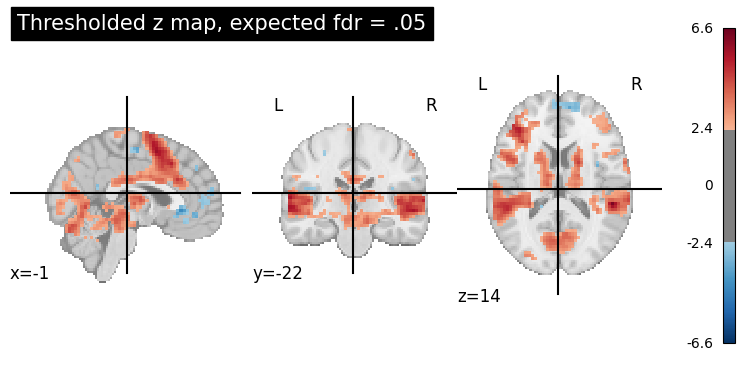

In [ ]:
# plot z-map
plotting.plot_stat_map(
    thresholded_map_fdr,
    cut_coords=display.cut_coords,
    title="Thresholded z map, expected fdr = .05",
    threshold=threshold_fdr,
)

**Bonferroni correction**

Bonferroni correction is a more conservative solution that controls the family wise error rate (FWER), i.e., the probability of making only one false detection, say at 5%.

We create a Bonferroni corrected thresholded z-map, with a FWER set to 0.05, and no cluster-level threshold:

In [ ]:
# create FWER corrected thresholded z-map
thresholded_map_fwer, threshold_fwer = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)

We plot the z-map:

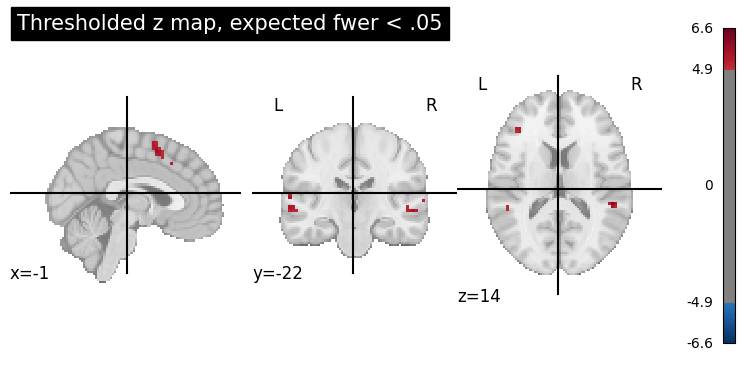

In [ ]:
# plot z-map
plotting.plot_stat_map(
    thresholded_map_fwer,
    cut_coords=display.cut_coords,
    title="Thresholded z map, expected fwer < .05",
    threshold=threshold_fwer,
)

### Note

These different corrections correspond to different statistical guarantees:

* FWER correction: there is only a probability smaller than 0.05 of observing any false positive voxel.
* FDR correction: 5% of the voxels found are likely to be false positive.
* Uncorrected: one expects a few tens of false positive voxels.